In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import pickle

In [2]:
fake_df = pd.read_csv('Resources/Fake.csv')
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
true_df = pd.read_csv('Resources/True.csv')
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
# Add fake/true column to datasets and concatenate

fake_df['target'] = 'fake'
true_df['target'] = 'true'
combined_df = pd.concat([fake_df,true_df]).reset_index(drop = True)
combined_df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [5]:
combined_df.tail()

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [6]:
# Shuffle the data
from sklearn.utils import shuffle
combined_df = shuffle(combined_df)
combined_df = combined_df.reset_index(drop=True)
combined_df.head()

,title,text,subject,date,target
0,BADASS CAMPUS COPS Cite Students For Wearing E...,Trigger warning If liberal schools and badass ...,left-news,"Apr 14, 2016",fake
1,U.S. panel probing Benghazi attack to report w...,WASHINGTON (Reuters) - The U.S. House panel in...,politicsNews,"May 20, 2016",true
2,Hillary Just Secured The Most Important GOP #...,"Colin Powell is a Republican, but he voted for...",News,"October 25, 2016",fake
3,Turkey orders 117 soldiers detained over Gulen...,ISTANBUL (Reuters) - Turkish prosecutors have ...,worldnews,"September 29, 2017",true
4,WATCH: Republican Senator Lashes Out At CNN H...,Republicans are desperately trying to convince...,News,"April 3, 2017",fake


In [7]:
# Removing the title & date
combined_df.drop(['title','date'], axis=1, inplace = True)
combined_df.head()

,text,subject,target
0,Trigger warning If liberal schools and badass ...,left-news,fake
1,WASHINGTON (Reuters) - The U.S. House panel in...,politicsNews,true
2,"Colin Powell is a Republican, but he voted for...",News,fake
3,ISTANBUL (Reuters) - Turkish prosecutors have ...,worldnews,true
4,Republicans are desperately trying to convince...,News,fake


In [12]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

combined_df['text'] = combined_df['text'].apply(punctuation_removal)
combined_df.head()

,text,subject,target
0,WHY IS THIS CRIMINAL ALLOWED TO JUST SKATE BY ...,left-news,fake
1,It s kind of poetic Russian help and Trump s t...,News,fake
2,MOSCOW Reuters Russian Deputy Foreign Ministe...,worldnews,true
3,21st Century Wire says The legal battle is wag...,Middle-east,fake
4,CAIRO Reuters British authorities have lifted...,worldnews,true


In [13]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

combined_df['text'] = combined_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ryanwilliams/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     44898 non-null  object
 1   subject  44898 non-null  object
 2   target   44898 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


In [15]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(combined_df['text'], combined_df.target, test_size=0.2, random_state=42)

In [16]:
X_train.shape, X_test.shape

((35918,), (8980,))

In [17]:
# Naive Bayes
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, y_pred)*100,2)

accuracy: 94.04%


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

        fake       0.94      0.94      0.94      4612
        true       0.94      0.94      0.94      4368

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [19]:
# Logistic Regression - Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
y_pred = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, y_pred)*100,2)

accuracy: 98.86%


In [20]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4612
        true       0.99      0.99      0.99      4368

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [21]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
y_pred = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, y_pred)*100,2)

accuracy: 99.6%


In [22]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

        fake       0.99      1.00      1.00      4612
        true       1.00      0.99      1.00      4368

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [23]:
pickle.dump(model, open("test_model.pkl", 'wb'))

In [54]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, y_pred)*100,2)

accuracy: 98.61%


In [55]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4677
        true       0.98      0.99      0.99      4303

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



([<matplotlib.axis.YTick at 0x125e3bad0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

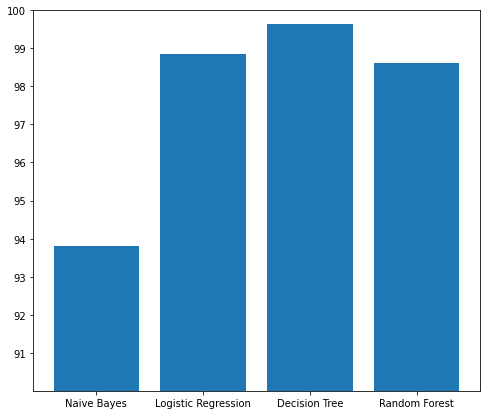

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

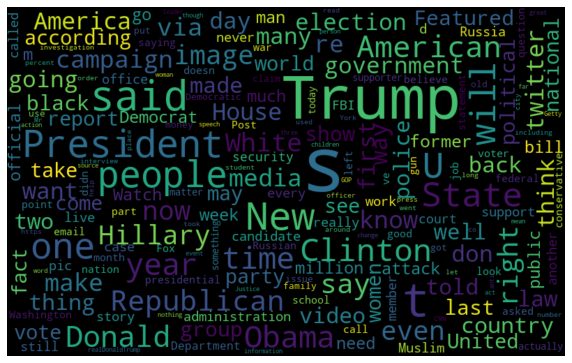

In [8]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = combined_df[combined_df["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

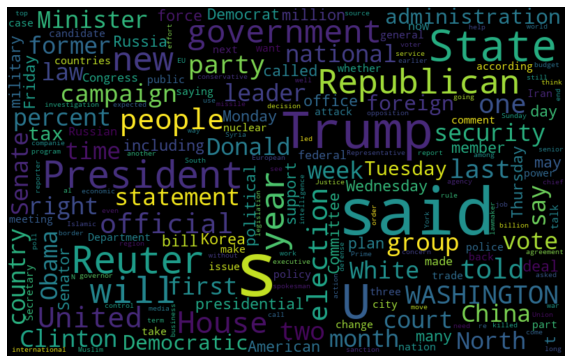

In [9]:
# Word cloud for true news
from wordcloud import WordCloud

fake_data = combined_df[combined_df["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [2]:
!pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=6008 sha256=b4c96a807714e15b3950f7a3bb8d2b9f2a6e7f764acbd819d852fd55d6ec1dcc
  Stored in directory: /Users/ryanwilliams/Library/Caches/pip/wheels/58/c6/8b/061bd4edc8cea2b2235758c3e50473d08499236fbfdd21e6b3
Successfully built pickle-mixin
